# Assignment 2

In [3]:
import pandas as pd
import json
import random
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer 
from collections import Counter 
# from numpy import random

In [42]:

def read_data(path):
    with open(path) as f:
        data = json.load(f)
    train_data = pd.DataFrame(data)
    return train_data

def preprocessing(df):
    lemmatizer = WordNetLemmatizer()
    for i in range(len(df)):
        df['ingredients'][i]=[x.lower() for x in df['ingredients'][i]]
        df['ingredients'][i]=[lemmatizer.lemmatize(x) for x in df['ingredients'][i]]
    return df

def create_nature_basket(df):
    lemmatizer = WordNetLemmatizer()

    NB = []
    for i in df['ingredients']:
        for j in i:
            j = j.lower()
            j = lemmatizer.lemmatize(j)
            if j not in NB:
                  NB.append(j)
    print('Nature Basket size = ', len(set(NB)))
    return NB


def fitness_value(NB):
    fitness = {}
    
    for i in NB:
        fitness[i] = random.uniform(0,1)
    
    return fitness


def data_info(df):
    print('number of recipes = ', len(df))
    print('number of ingredients = ',len(NB))
    print('Ratio of number of ingredients to number of recipes = ', len(NB)/len(df))
    return

def create_initial_primordial_cuisine(NB,rec_size):

    pc = []
    KB = random.sample(NB,k=50)
    
    for i in KB:
        NB.remove(i)

    print('Kitchen Basket size = ', len(set(KB)))

    while(len(pc)<500):

        cus = set(random.sample(KB,rec_size))
        if cus not in pc:
            pc.append(cus)
    print('Primoridal cuisine of size ' + str(len(pc)) + ' created' )
    return pc,KB,NB


def copy_mutate_algorithm(pc,KB,epochs,total_size,NB,fitness,choose):

    rec_per_epoch = round(total_size/epochs)
    print('Recipes generated in each epoch = ', rec_per_epoch)

    phi = (len(NB)+len(KB))/total_size

    for i in range(1,epochs+1):
        
        
#         new_cus = []
        print('ratio = ' + str(len(KB)/len(pc)))
        
#         il = len(pc)

        

        while len(pc)<rec_per_epoch*i:
#         for l in range(0,rec_per_epoch*i - il): 
        

            
            delta = len(KB)/len(pc)
            
            if(delta>=phi):
                

                old_rec = list(random.choice(pc))
                prev_len = len(pc)

                while prev_len == len(pc):

                    rem = random.choice(old_rec)
                    new = random.choice(KB)

                    if fitness[new]>fitness[rem] and new not in old_rec:
                        old_rec.remove(rem)
                        old_rec.append(new)
                        
#                     print(len(set(old_rec)))
                    
                    if set(old_rec) not in pc:
                        pc.append(set(old_rec))
#                     new_cus.append(set(old_rec))
            else:
                    ni = random.choice(NB)
                    KB.append(ni)
                    NB.remove(ni)
                    
        print('Length of kitchen basket = ' + str(len(KB)) + ' after epoch ' + str(i))
        print('Length of primordial cuisine = ' + str(len(pc)) + ' after epoch ' + str(i))
        freq_rank_plot(pc,i,choose)
        plt.show()
        rec_size_distribution(pc,i,choose)
        plt.show()
#         KB = random.sample(NB,k=round(len(pc)*phi))


    return pc


def freq_rank_plot(pc,epoch,choose):
    all_w=[]

    for i in range(len(pc)):
          all_w+=pc[i]


    count_word = Counter(all_w)
    print('feature length' , len(count_word)) 
    total_words=len(all_w)
    # print(total_words)
    sorted_words=count_word.most_common(total_words)
    # print(sorted_words)
    vocab_to_int={i+1:c/sorted_words[0][1] for i,(w,c) in enumerate(sorted_words)}
    # print(vocab_to_int)
    plt.loglog(vocab_to_int.keys(),vocab_to_int.values(),label = str(epoch))
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    
    if choose == 'all':
        plt.title('Frequency-Rank distribution for epoch ' + str(epoch))
        plt.grid()
#         plt.show()
    
    
    else:
        plt.title('Frequency-Rank distribution for all epochs ')
        plt.legend()
        plt.grid()
    
    
    
    return

def rec_size_distribution(pc,epoch,choose):
    len_ingre = {}
    for i in list(pc):
        if len(i) in len_ingre.keys():
                len_ingre[len(i)] = len_ingre[len(i)]+(100/len(pc))
        else:
            len_ingre[len(i)]=100/(len(pc))
    lists = sorted(len_ingre.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y,marker='o',label = str(epoch))
    plt. xlabel('Recipe size')
    plt.title('Recipe size distribution for ' + str(epoch))
    plt.ylabel('Percentage')
    # plt.legend(list(train_data['cuisine'].unique()))
    
    if choose == 'all':
        plt.title('Recipe size distribution for ' + str(epoch))
        plt.grid()
#         plt.show()
    
    
    else:
        plt.title('Recipe size distribution for all epochs ')
        plt.legend()
        plt.grid()
    
#     plt.grid()
#     plt.show()
    
    return






In [5]:
# q1 = question1()
df = read_data('Downloads/archive/train.json')

In [6]:
NB = create_nature_basket(df)
fitness = fitness_value(NB)

Nature Basket size =  6703


In [7]:
data_info(df)

# pc = copy_mutate_algorithm(pc,KB,)

number of recipes =  39774
number of ingredients =  6703
Ratio of number of ingredients to number of recipes =  0.16852717855885754


Nature Basket size =  6703
Kitchen Basket size =  50
Primoridal cuisine of size 500 created
feature length 50


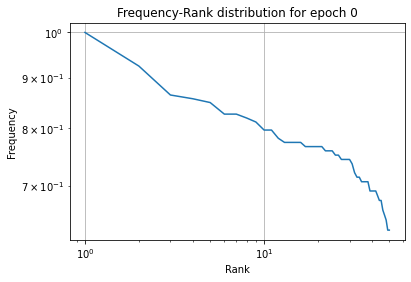

Recipes generated in each epoch =  6629
ratio = 0.1
Length of kitchen basket = 1117 after epoch 1
Length of primordial cuisine = 6629 after epoch 1
feature length 838


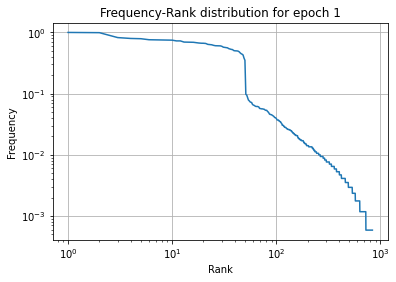

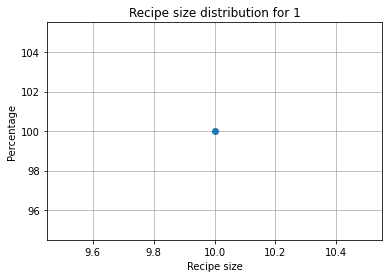

ratio = 0.16850203650626036
Length of kitchen basket = 2235 after epoch 2
Length of primordial cuisine = 13258 after epoch 2
feature length 1634


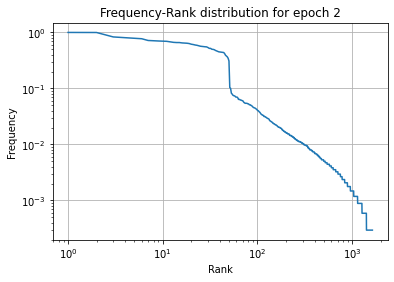

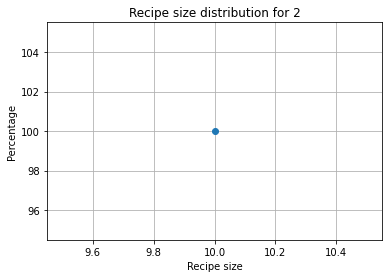

ratio = 0.16857746266405188
Length of kitchen basket = 3352 after epoch 3
Length of primordial cuisine = 19887 after epoch 3
feature length 2479


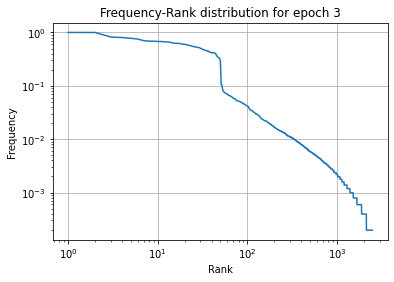

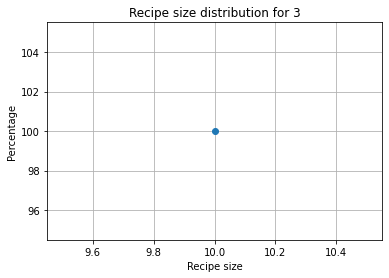

ratio = 0.16855232061145473
Length of kitchen basket = 4469 after epoch 4
Length of primordial cuisine = 26516 after epoch 4
feature length 3296


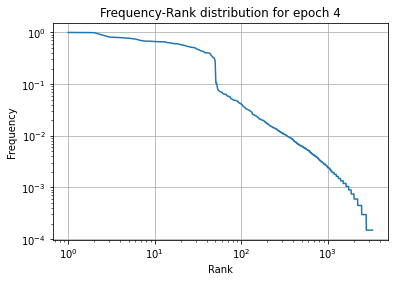

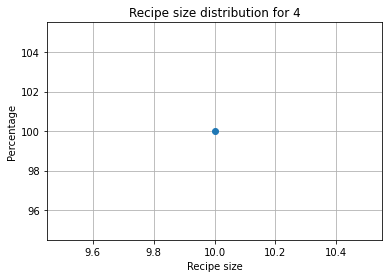

ratio = 0.16853974958515613
Length of kitchen basket = 5586 after epoch 5
Length of primordial cuisine = 33145 after epoch 5
feature length 4116


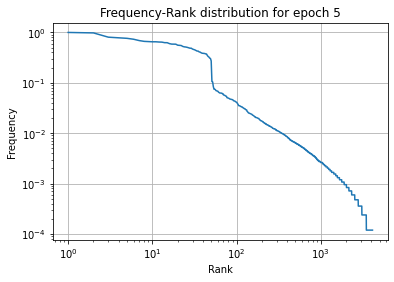

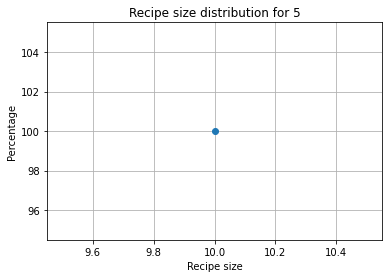

ratio = 0.16853220696937699
Length of kitchen basket = 6703 after epoch 6
Length of primordial cuisine = 39774 after epoch 6
feature length 4907


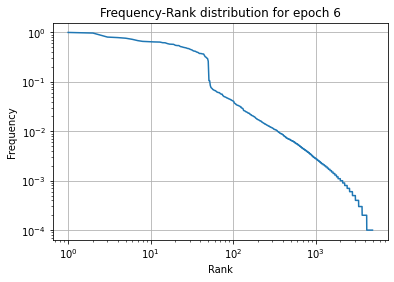

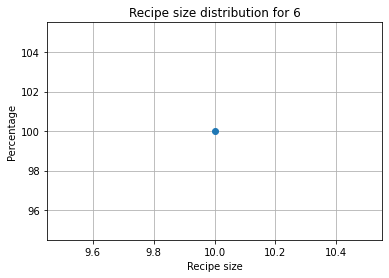

In [37]:
NB = create_nature_basket(df)
fitness = fitness_value(NB)
rec_size = 10
pc,KB,NB = create_initial_primordial_cuisine(NB,rec_size)
freq_rank_plot(pc,0,'all')
plt.show()
epochs = 6
pc = copy_mutate_algorithm(pc,KB,6,39774,NB,fitness,'all')

Nature Basket size =  6703
Kitchen Basket size =  50
Primoridal cuisine of size 500 created
Recipes generated in each epoch =  6629
ratio = 0.1
Length of kitchen basket = 1117 after epoch 1
Length of primordial cuisine = 6629 after epoch 1
feature length 853
ratio = 0.16850203650626036
Length of kitchen basket = 2235 after epoch 2
Length of primordial cuisine = 13258 after epoch 2
feature length 1705
ratio = 0.16857746266405188
Length of kitchen basket = 3352 after epoch 3
Length of primordial cuisine = 19887 after epoch 3
feature length 2536
ratio = 0.16855232061145473
Length of kitchen basket = 4469 after epoch 4
Length of primordial cuisine = 26516 after epoch 4
feature length 3391
ratio = 0.16853974958515613
Length of kitchen basket = 5586 after epoch 5
Length of primordial cuisine = 33145 after epoch 5
feature length 4210
ratio = 0.16853220696937699
Length of kitchen basket = 6703 after epoch 6
Length of primordial cuisine = 39774 after epoch 6
feature length 5035


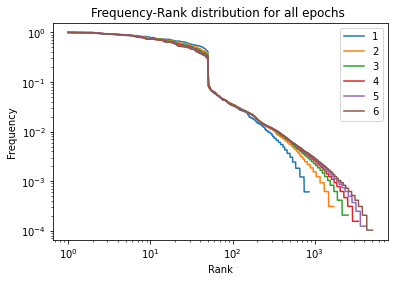

In [11]:
NB = create_nature_basket(df)
fitness = fitness_value(NB)
rec_size = 10
pc,KB,NB = create_initial_primordial_cuisine(NB,rec_size)
epochs = 6
pc = copy_mutate_algorithm(pc,KB,6,39774,NB,fitness,'one')

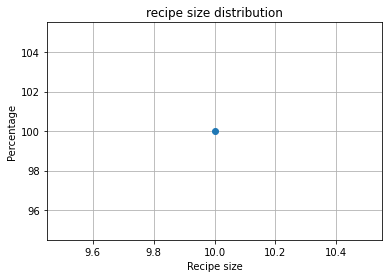

In [123]:
rec_size_distribution(pc)

# Question 2

In [43]:
def cma(pc,KB,epochs,total_size,NB,fitness,choose):

    rec_per_epoch = round(total_size/epochs)
    print('Recipes generated in each epoch = ', rec_per_epoch)

    phi = (len(NB)+len(KB))/total_size

    for i in range(1,epochs+1):
        
        
#         new_cus = []
        print('ratio = ' + str(len(KB)/len(pc)))
        
#         il = len(pc)

        

        while len(pc)<rec_per_epoch*i:
#         for l in range(0,rec_per_epoch*i - il): 
        

            
            delta = len(KB)/len(pc)
            
            if(delta>=phi):
                

                old_rec = list(random.choice(pc))
                prev_len = len(pc)
                pr = [0,1,2,2]         
                ch = random.choice(pr)

                while prev_len == len(pc):           
                    
                    if(ch==2):

                        rem = random.choice(old_rec)
                        new = random.choice(KB)

                        if fitness[new]>fitness[rem] and new not in old_rec:
                            old_rec.remove(rem)
                            old_rec.append(new)
                    
                    elif(ch==1):
                        
                        new = random.choice(KB)
                        old_rec.append(new)
                    
                    else:
                        
                        rem = random.choice(old_rec)
                        old_rec.remove(rem)
                        
#                     print(len(set(old_rec)))
                    
                    if set(old_rec) not in pc:
                        pc.append(set(old_rec))
#                     new_cus.append(set(old_rec))
            else:
                    ni = random.choice(NB)
                    KB.append(ni)
                    NB.remove(ni)
                    
        print('Length of kitchen basket = ' + str(len(KB)) + ' after epoch ' + str(i))
        print('Length of primordial cuisine = ' + str(len(pc)) + ' after epoch ' + str(i))
        freq_rank_plot(pc,i,choose)
        plt.show()
        rec_size_distribution(pc,i,choose)
        plt.show()
#         KB = random.sample(NB,k=round(len(pc)*phi))


    return pc

Nature Basket size =  6703
number of recipes =  39774
number of ingredients =  6703
Ratio of number of ingredients to number of recipes =  0.16852717855885754
Kitchen Basket size =  50
Primoridal cuisine of size 500 created
Recipes generated in each epoch =  6629
ratio = 0.1
Length of kitchen basket = 1117 after epoch 1
Length of primordial cuisine = 6629 after epoch 1
feature length 893
ratio = 0.16850203650626036
Length of kitchen basket = 2235 after epoch 2
Length of primordial cuisine = 13258 after epoch 2
feature length 1771
ratio = 0.16857746266405188
Length of kitchen basket = 3352 after epoch 3
Length of primordial cuisine = 19887 after epoch 3
feature length 2682
ratio = 0.16855232061145473
Length of kitchen basket = 4469 after epoch 4
Length of primordial cuisine = 26516 after epoch 4
feature length 3567
ratio = 0.16853974958515613
Length of kitchen basket = 5586 after epoch 5
Length of primordial cuisine = 33145 after epoch 5
feature length 4449
ratio = 0.16853220696937699
L

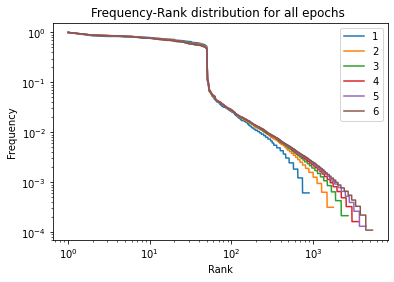

In [127]:
NB = create_nature_basket(df)
data_info(df)
fitness = fitness_value(NB)
rec_size = 10
pc,KB,NB = create_initial_primordial_cuisine(NB,rec_size)
epochs = 6
pc = cma(pc,KB,6,39774,NB,fitness,'one')

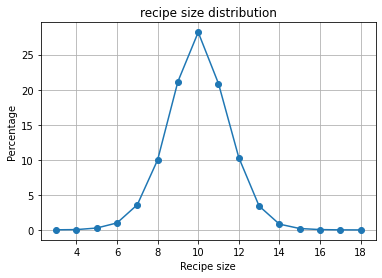

In [128]:
rec_size_distribution(pc)

Nature Basket size =  6703
number of recipes =  39774
number of ingredients =  6703
Ratio of number of ingredients to number of recipes =  0.16852717855885754
Kitchen Basket size =  50
Primoridal cuisine of size 500 created
Recipes generated in each epoch =  6629
ratio = 0.1
Length of kitchen basket = 1117 after epoch 1
Length of primordial cuisine = 6629 after epoch 1
feature length 890


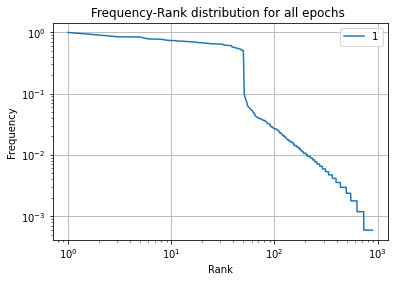

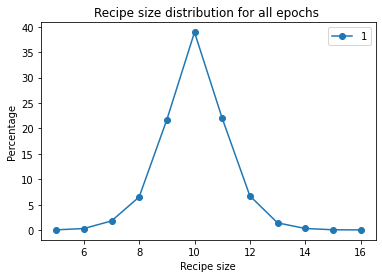

ratio = 0.16850203650626036
Length of kitchen basket = 2235 after epoch 2
Length of primordial cuisine = 13258 after epoch 2
feature length 1749


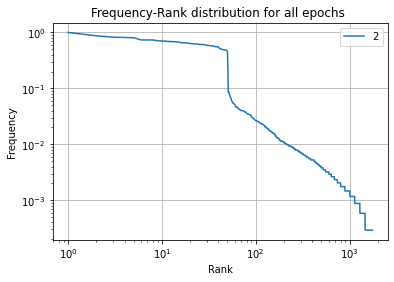

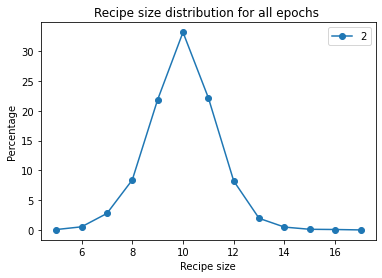

ratio = 0.16857746266405188
Length of kitchen basket = 3352 after epoch 3
Length of primordial cuisine = 19887 after epoch 3
feature length 2644


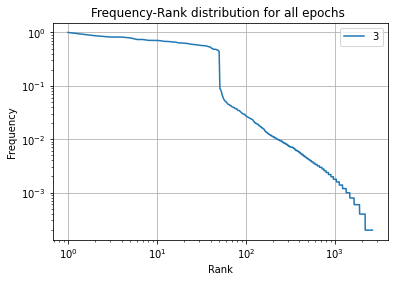

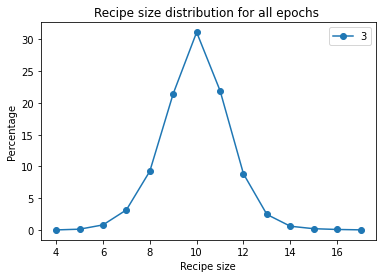

ratio = 0.16855232061145473
Length of kitchen basket = 4469 after epoch 4
Length of primordial cuisine = 26516 after epoch 4
feature length 3534


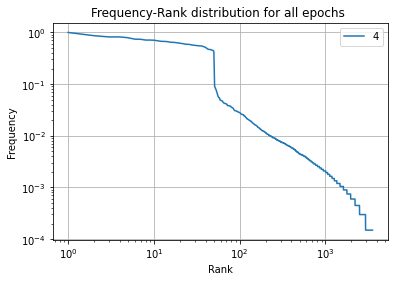

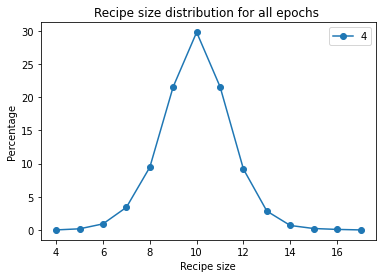

ratio = 0.16853974958515613
Length of kitchen basket = 5586 after epoch 5
Length of primordial cuisine = 33145 after epoch 5
feature length 4392


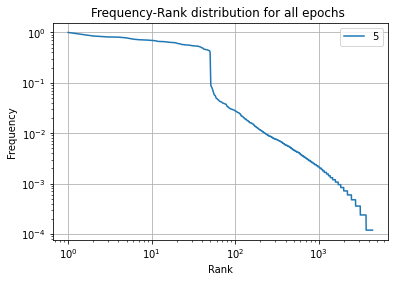

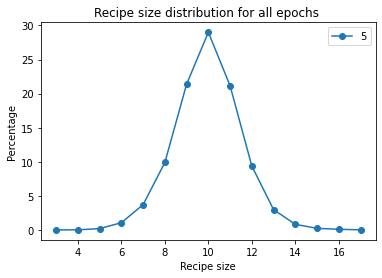

ratio = 0.16853220696937699
Length of kitchen basket = 6703 after epoch 6
Length of primordial cuisine = 39774 after epoch 6
feature length 5253


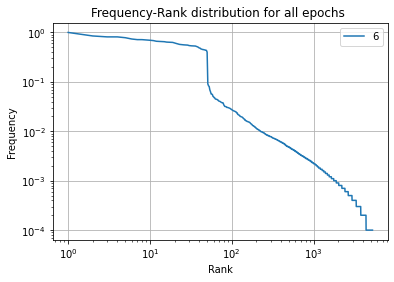

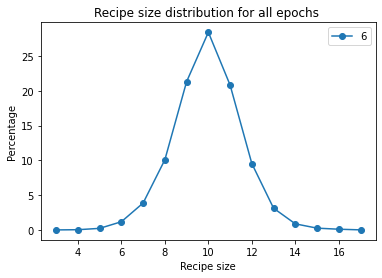

In [44]:
NB = create_nature_basket(df)
data_info(df)
fitness = fitness_value(NB)
rec_size = 10
pc,KB,NB = create_initial_primordial_cuisine(NB,rec_size)
epochs = 6
pc = cma(pc,KB,6,39774,NB,fitness,'one')